<a href="https://colab.research.google.com/github/emmagope/emmagope/blob/main/regression_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Regression_tuner.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Regression_tuner.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
tf.keras.utils.set_random_seed(0)

# Abalone Dataset

Abalones are marine snails that can be found along coasts of almost every continent.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/AbaloneInside.jpg/440px-AbaloneInside.jpg" alt="abalone" border="0" width="400" height="500">



In this notebook we are going to Predict the age of abalone from physical measurements. [Link to documentation](https://archive.ics.uci.edu/ml/datasets/abalone).

In [ ]:
df_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
df_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [ ]:
y_train = df_train.pop('Age')
X_train = df_train.copy()

In [ ]:
df_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
y_test = df_test.pop('Age')
X_test = df_test.copy()

In [ ]:
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (3320, 7), X_test shape: (850, 7)


## Regression Losses

- **Mean Squared Error (MSE)**:

```python
tf.keras.losses.MSE
```
```python
model.compile(loss='mse') or model.compile(loss=tf.keras.losses.MSE)
```

$$ \mathrm{MSE} = \frac{\sum_{i=1}^n\left( y_i - \hat{y_i}\right)^2}{n}$$


- **Mean Absolute Error (MAE)**:

```python
tf.keras.losses.MAE
```
```python
model.compile(loss='mae') or model.compile(loss=tf.keras.losses.MAE)
```

$$ \mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i - \hat{y_i}\right|}{n}$$


## Question 1: Create a net with at least 1 hidden layer


1. You can use the [Functional API](https://keras.io/guides/functional_api/):

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(...,))
    layer_1 = layers.Dense(...)(inputs)
```

and the network outputs:
```python
outputs = layers.Dense(...)(previous_layer)
model = keras.Model(inputs=inputs, outputs=outputs)
```

2. Or you can use [Sequential API](https://keras.io/guides/sequential_model/)

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,))
model.add(...
```

You can introduce regularization methods seen in [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb) like [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout):


```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))


In [ ]:
model = keras.Sequential()

model.add(layers.Dense(64, input_shape=(7,), activation='relu')) #Capa oculta de neuronas
#64 es el número de neuronas que quiero poner (está bien de 16 a 128)
#Solo estoy poniendo una capa oculta
#Activacion es relu para capas ocultas y linear para el output de regresión
#input_shape es el número de columnas del dataset quitando la columna de la target
model.add(layers.Dense(32, activation='relu'))

# output layer
model.add(layers.Dense(64, activation='linear'))

## model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         2,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,704 (18.38 KB)

 Trainable params: 4,704 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Layer (type) es el nombre de la capa
#Output shape es la forma (dimensión) de la salida que genera esa capa: significa que cada muestra que pasa por esa capa sale con 64 valores
#Param es el nº de parámetros entrenables (pesos + sesgos) de cada capa primera capa es 8 x 64 neuronas y el output es 64 x 64 porque es lo que saca la capa anterior

In [ ]:
# Using the Functional API
# 1. Define the input layer (definir la capa de entrada)
inputs = keras.Input(shape=(7,)) #indicar que mi input tiene 8 columnas

# 2. Build the hidden layers, You can also add dropout or other layer types
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x) #0.3 de Dropout para evitar el overfitting (desactiva un 30% de las neuronas al entrenar)
x = layers.Dense(32, activation='relu')(x)

# 3. Define the output layer
outputs = layers.Dense(1, activation='linear')(x) #solo una neurona de salida porque es regresión lineal

# 4. Create the model by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

# Model summary
model.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', #que métrica observar (pérdida en validacion)
    patience=5, #nº de epocas que espera antes de parar
    min_delta=0.001, #mejora mínima de las epocas para que cuente
    restore_best_weights=True, #si volver o no al mejor modelo encontrado
)

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse'],
)
model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    )

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 96.5150 - mae: 9.3406 - mse: 96.5150 - val_loss: 35.0584 - val_mae: 5.2674 - val_mse: 35.0584
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 17.5798 - mae: 3.3102 - mse: 17.5798 - val_loss: 8.0654 - val_mae: 2.0558 - val_mse: 8.0654
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8924 - mae: 2.2023 - mse: 8.8924 - val_loss: 7.2393 - val_mae: 1.9840 - val_mse: 7.2393
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.1623 - mae: 2.0969 - mse: 8.1623 - val_loss: 6.9337 - val_mae: 1.9233 - val_mse: 6.9337
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7036 - mae: 2.0348 - mse: 7.7036 - val_loss: 6.7451 - val_mae: 1.8941 - val_mse: 6.7451
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5888 - mae: 2.0305 - mse: 7.5888 - val_loss: 6.4596 - val_mae: 1.8748 - val_mse: 6.4596
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.1977 - mae: 1.9891 - mse: 7.1977 - val_loss: 

In [ ]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8302 - mae: 1.6196 - mse: 5.8302
Test Loss: 5.3124260902404785


## Question 2: Normalize the inputs and train the same model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
print('X_train mu, sigma', X_train_norm.mean(0), X_train_norm.std(0))
print('X_test mu, sigma', X_test_norm.mean(0), X_test_norm.std(0))

X_train mu, sigma [ 2.77689518e-16  4.65491099e-17  2.50402109e-16 -2.81434849e-16
  2.18299274e-16  1.77100637e-16 -1.05404306e-16] [1. 1. 1. 1. 1. 1. 1.]
X_test mu, sigma [-7.31441052e-17 -3.53181536e-16  2.81082347e-16 -9.61322525e-17
  1.02401747e-16  2.82127263e-17 -1.46288210e-16] [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, input_shape=(7,), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

## model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MSE,
    metrics=['mae']
)

model.fit(
    X_train_norm,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],  # early stoppings
    )

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 91.5234 - mae: 8.9616 - val_loss: 33.7553 - val_mae: 4.8543
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.1561 - mae: 4.5579 - val_loss: 19.5747 - val_mae: 3.5845
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17.0618 - mae: 3.1734 - val_loss: 7.4821 - val_mae: 1.9507
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1224 - mae: 2.0533 - val_loss: 5.9165 - val_mae: 1.7151
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5191 - mae: 1.8613 - val_loss: 5.5753 - val_mae: 1.6778
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3849 - mae: 1.8599 - val_loss: 5.3268 - val_mae: 1.6492
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8885 - mae: 1.7926 - val_loss: 5.1424 - val_mae: 1.6284
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7487 - mae: 1.8012 - val_loss: 5.0111 - val_mae: 1.5991
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6627 - 

In [ ]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6168 - mae: 1.5896 
Test Loss: 5.129050254821777


## Optimizers:

- [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD): Gradient descent with momentum
```python
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
```
If momentum is 0:
```python
w = w - learning_rate * gradient
```
If we have momentum:

 ```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```


- [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop): Root Mean Square Propagation
```python
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
```
- [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam): Adaptive Moment Estimation,  is an update to the RMSProp algorithm
```python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```

```python
model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
```

## Question 3: Train the same model with different optimizers

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, input_shape=(7,), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='linear'))
## model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.MSE,
    metrics=['mae']
)
model.fit(X_train_norm, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24.8592 - mae: 3.6731 - val_loss: 5.9489 - val_mae: 1.8029
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0232 - mae: 1.8198 - val_loss: 5.6619 - val_mae: 1.7248
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3415 - mae: 1.7047 - val_loss: 4.6492 - val_mae: 1.5603
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6682 - mae: 1.5758 - val_loss: 4.5878 - val_mae: 1.5341
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5562 - mae: 1.5698 - val_loss: 4.5775 - val_mae: 1.5617
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3902 - mae: 1.5322 - val_loss: 4.5627 - val_mae: 1.5224
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4213 - mae: 1.5173 - val_loss: 4.4490 - val_mae: 1.5294
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4139 - mae: 1.5074 - val_loss: 4.7337 - val_mae: 1.5844
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3818 - mae:

In [ ]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5440 - mae: 1.5755
Test Loss: 5.048673629760742


# Keras Tuner : Introduction to Hyperparameter Optimization

The [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) is a library for hyper-parameter tuning.

## What is Hyperparameter Tuning?

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model to maximize its performance. Unlike model parameters (weights and biases) that are learned during training, hyperparameters are set before the learning process begins and influence how the model learns.

Common hyperparameters include:
- **Model architecture**: number of layers, units per layer
- **Training parameters**: learning rate, batch size, dropout rate
- **Regularization**: L1/L2 penalties, early stopping criteria

Manual tuning of these parameters can be time-consuming and often leads to suboptimal results. Keras Tuner provides an automated approach to efficiently search the hyperparameter space.

## Understanding Different Tuning Strategies

Keras Tuner offers four main strategies for hyperparameter optimization:

### 1. RandomSearch
- **How it works**: Randomly samples from the hyperparameter space
- **Pros**: Simple, easily parallelizable, no assumptions about parameter importance
- **Cons**: Can be inefficient for large search spaces
- **Best for**: Initial exploration or when little is known about the hyperparameter landscape

### 2. Hyperband
- **How it works**: Allocates resources (epochs) dynamically, quickly discarding poor performers
- **Pros**: More efficient than random search, especially for deep networks
- **Cons**: More complex to configure correctly
- **Best for**: When training is computationally expensive and you want to balance exploration vs. exploitation

### 3. BayesianOptimization
- **How it works**: Builds a probability model of the objective function and uses it to select hyperparameters
- **Pros**: More efficient use of resources, learns from previous evaluations
- **Cons**: More complex, computationally intensive for each iteration
- **Best for**: When evaluation is expensive and you have a moderate search space

### 4. Sklearn
- **How it works**: Interface to scikit-learn's hyperparameter search methods
- **Pros**: Familiar API for those coming from scikit-learn
- **Cons**: Limited to sklearn's hyperparameter tuning capabilities
- **Best for**: When integrating with existing sklearn pipelines


In [ ]:
 !pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-36-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Hyperparameters are of two types:
1. **Model hyperparameters** like number of units, type of activation or number hidden layers.
2. **Algorithm hyperparameters** like the learning rate in adam.

The model-building function takes an argument `hp` from which you can sample hyper-parameters.

```python
def build_model(hp):
    ...
    return model

```

- `hp.Int` to sample an integer from a certain range:
```python
hp.Int('units', min_value=32, max_value=256, step=32, default=64)
```
- `hp.Float` to sample a float number from a certain range:
```python
hp.Float('dropout', min_value=0.0, max_value=0.1, default=0.005, step=0.05)
```
- `hp.Choice` to select values in a list:
```python
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
```
- [list of hyperparameter methods](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    # Sample different number of layers with hp.Int
    for i in range(hp.Int('num_layers', 1, 3)):
        # Sample different number of layers with hp.Int
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=64,
                                            max_value=128,
                                            step=32),
                               activation='relu'))
    # Sample different activation functions with hp.Choice
    model.add(layers.Dense(1, activation=hp.Choice('output_activation', ['relu', 'linear'])))

    # Sample different activation functions with hp.Choice
    model.compile(
        loss='mse',
        metrics=['mae'])
    return model

The Keras Tuner has four [tuners](https://keras-team.github.io/keras-tuner/documentation/tuners/) available  `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`


In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=15,
                     factor=3,
                     hyperband_iterations=1,
                     directory='my_dir',
                     project_name='intro_to_kt')
'''
tuner = kt.RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=100,
                     directory='my_dir',
                     project_name='intro_to_kt')
'''
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train_norm, y_train, epochs=30, validation_split=0.15, batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Trial 30 Complete [00h 00m 11s]
val_loss: 4.7142653465271

Best val_loss So Far: 4.7142653465271
Total elapsed time: 00h 02m 51s
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'output_activation', 'default': 'relu', 'conditions': [], 'values': ['relu', 'linear'], 'ordered': False}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_2', 'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}], 'values': {'num_layers': 2, 'units_0': 96, 'output_activation': 'relu', 'uni

In [ ]:
tuner.results_summary() #El tuner hace búsqueda de hiperparámetros

#Significado de los parámetros:
#num_layers: numero de capas
#units_0,1,2...: numero de neuronas en cada capa oculta
#output_activation: activacion usada en la capa de salida
#score: mejor métrica optimizada
#tuner/epochs: cuantas epocas se entreno el modelo
#turner/round, trial, bracket: internos del algoritmo de busqueda

Results summary
Results in my_dir/intro_to_kt
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
num_layers: 2
units_0: 96
output_activation: relu
units_1: 96
units_2: 64
tuner/epochs: 15
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.7142653465271

Trial 0028 summary
Hyperparameters:
num_layers: 2
units_0: 96
output_activation: relu
units_1: 96
units_2: 96
tuner/epochs: 15
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.738086700439453

Trial 0027 summary
Hyperparameters:
num_layers: 2
units_0: 128
output_activation: relu
units_1: 128
units_2: 128
tuner/epochs: 15
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.7528815269470215

Trial 0025 summary
Hyperparameters:
num_layers: 2
units_0: 64
output_activation: linear
units_1: 96
units_2: 64
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 4.788181304931641

Trial 0017 summary
Hyperparam

In [ ]:
print(f"Best output activation function: {best_hps.get('output_activation')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units of hidden layer {i+1}: {best_hps.get('units_' + str(i))}")

Best output activation function: relu
Best number of hidden layers: 2
Number of units of hidden layer 1: 96
Number of units of hidden layer 2: 96


### Hyperparameter Importance

Extracting hyperparameter data from tuner...
Analyzed 30 trials

Top 10 configurations:

Rank 1 (Score: 4.7143):
  num_layers: 2
  output_activation: relu
  tuner/bracket: 0
  tuner/epochs: 15
  tuner/initial_epoch: 0
  tuner/round: 0
  tuner/trial_id: nan
  units_0: 96
  units_1: 96
  units_2: 64

Rank 2 (Score: 4.7381):
  num_layers: 2
  output_activation: relu
  tuner/bracket: 0
  tuner/epochs: 15
  tuner/initial_epoch: 0
  tuner/round: 0
  tuner/trial_id: nan
  units_0: 96
  units_1: 96
  units_2: 96

Rank 3 (Score: 4.7529):
  num_layers: 2
  output_activation: relu
  tuner/bracket: 0
  tuner/epochs: 15
  tuner/initial_epoch: 0
  tuner/round: 0
  tuner/trial_id: nan
  units_0: 128
  units_1: 128
  units_2: 128

Rank 4 (Score: 4.7882):
  num_layers: 2
  output_activation: linear
  tuner/bracket: 1
  tuner/epochs: 15
  tuner/initial_epoch: 5
  tuner/round: 1
  tuner/trial_id: 0019
  units_0: 64
  units_1: 96
  units_2: 64

Rank 5 (Score: 4.8268):
  num_layers: 3
  output_activation: 

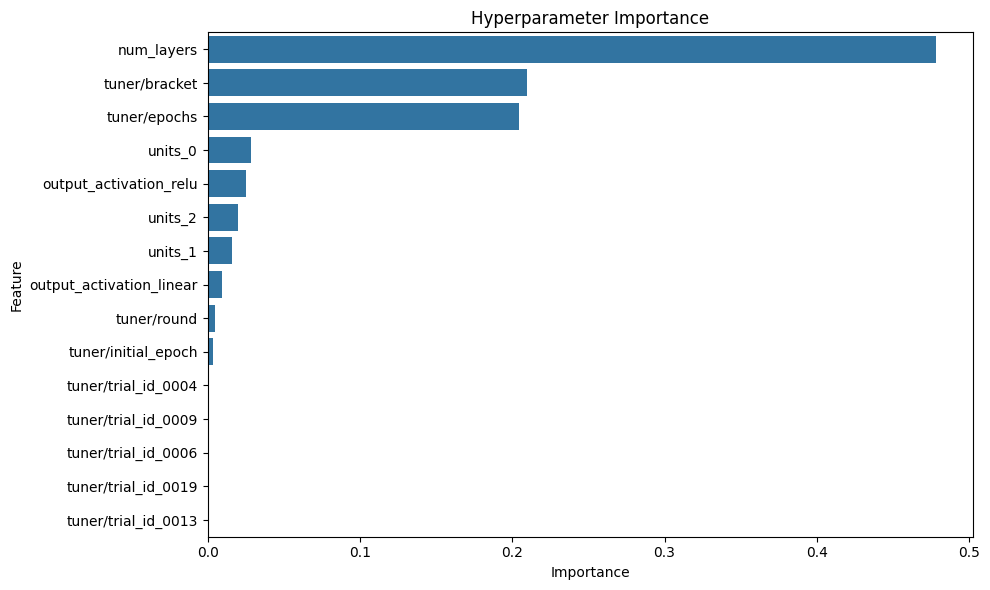


Hyperparameter importance ranking:
1. num_layers: 0.4784
2. tuner/bracket: 0.2095
3. tuner/epochs: 0.2046
4. units_0: 0.0284
5. output_activation_relu: 0.0253
6. units_2: 0.0201
7. units_1: 0.0161
8. output_activation_linear: 0.0093
9. tuner/round: 0.0047
10. tuner/initial_epoch: 0.0036
11. tuner/trial_id_0004: 0.0000
12. tuner/trial_id_0009: 0.0000
13. tuner/trial_id_0006: 0.0000
14. tuner/trial_id_0019: 0.0000
15. tuner/trial_id_0013: 0.0000


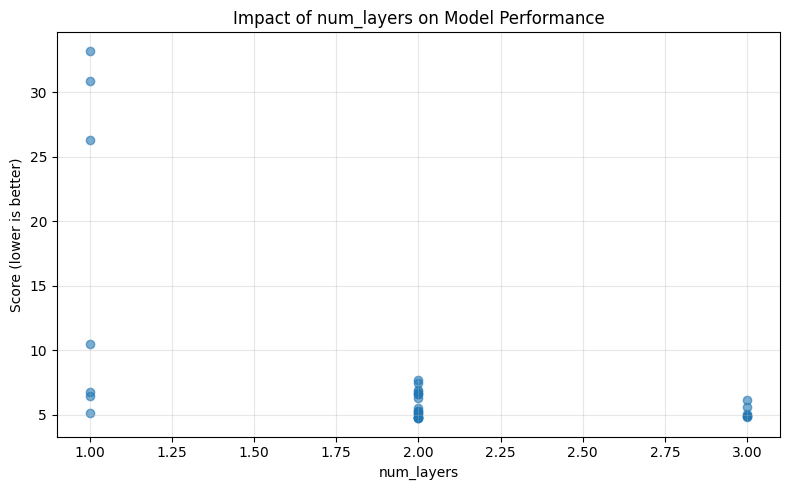


Analysis complete. Use these insights to refine your hyperparameter search!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

def analyze_hyperparameter_importance(tuner, top_n=10):
    """
    Analyze the importance of different hyperparameters using Random Forest.

    Parameters:
    -----------
    tuner : keras_tuner.Tuner
        The tuner object after running a hyperparameter search
    top_n : int, default=10
        Number of top trials to print

    Returns:
    --------
    importance_df : pandas.DataFrame
        DataFrame containing the importance of each hyperparameter
    """
    print("Extracting hyperparameter data from tuner...")

    # Extract hyperparameters and scores from tuner
    hp_results = []

    for trial_id, trial in tuner.oracle.trials.items():
        if trial.score is not None:  # Only include completed trials
            # Get hyperparameters
            hp_values = trial.hyperparameters.values
            # Add score (lower is better for loss)
            hp_values['score'] = trial.score
            hp_results.append(hp_values)

    # Convert to DataFrame
    results_df = pd.DataFrame(hp_results)

    # Show basic stats
    print(f"Analyzed {len(results_df)} trials")
    print("\nTop {top_n} configurations:".format(top_n=top_n))
    top_configs = results_df.sort_values('score').head(top_n)
    for i, (_, config) in enumerate(top_configs.iterrows()):
        print(f"\nRank {i+1} (Score: {config['score']:.4f}):")
        for param, value in sorted(config.items()):
            if param != 'score':
                print(f"  {param}: {value}")

    # Prepare data for Random Forest
    X = results_df.drop('score', axis=1)

    # Convert non-numeric columns to numeric
    for col in X.columns:
        if X[col].dtype == 'object':
            # Create dummies for categorical variables
            dummies = pd.get_dummies(X[col], prefix=col)
            X = pd.concat([X.drop(col, axis=1), dummies], axis=1)

    y = results_df['score']

    # Train Random Forest for feature importance
    print("\nTraining Random Forest to analyze hyperparameter importance...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importance
    importance = rf.feature_importances_

    # Create DataFrame of features and importance
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title('Hyperparameter Importance')
    plt.tight_layout()
    plt.show()

    # Print importance values
    print("\nHyperparameter importance ranking:")
    for i, (_, row) in enumerate(importance_df.iterrows()):
        if i < 15:  # Print top 15
            print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")

    # Analyze top feature's impact with partial dependence plot
    top_feature = importance_df.iloc[0]['Feature']
    if top_feature in X.columns:  # Ensure it's a numeric feature
        plt.figure(figsize=(8, 5))
        plt.scatter(X[top_feature], y, alpha=0.6)
        plt.title(f'Impact of {top_feature} on Model Performance')
        plt.xlabel(top_feature)
        plt.ylabel('Score (lower is better)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    print("\nAnalysis complete. Use these insights to refine your hyperparameter search!")

    return importance_df



# After running tuner.search():

# 1. Get overall importance
importance_df = analyze_hyperparameter_importance(tuner)




## Train the model

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_norm, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 60.8285 - mae: 6.6380 - val_loss: 13.7887 - val_mae: 2.7917
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.5965 - mae: 2.3032 - val_loss: 6.7075 - val_mae: 1.8809
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6092 - mae: 1.8279 - val_loss: 5.8466 - val_mae: 1.7375
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7269 - mae: 1.7077 - val_loss: 5.4040 - val_mae: 1.6550
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2258 - mae: 1.6361 - val_loss: 5.1651 - val_mae: 1.6143
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9365 - mae: 1.5947 - val_loss: 5.0344 - val_mae: 1.5894
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7575 - mae: 1.5708 - val_loss: 4.9534 - val_mae: 1.5753
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6308 - mae: 1.5554 - val_loss: 4.9050 - val_mae: 1.5693
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5349 - m

In [ ]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8103 - mae: 1.5997
Test Loss: 5.287020683288574


## Question 4: Try to search with dropout

In [ ]:
def build_model(hp):
    """Build a model with tunable architecture and dropout regularization."""
    model = keras.Sequential()

    # Tune the number of layers (try 1-4 layers)
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        # Tune the number of units in each layer
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        ))

        # Add dropout after the dense layer
        # Hint: Experiment with different dropout ranges
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer for regression)
    model.add(layers.Dense(1, activation='linear'))

    # Tune the optimizer and learning rate
    # Hint: Try different optimizers and log-scale for learning rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

 #Compile the model
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=15,
                     factor=3,
                     hyperband_iterations=1,
                     directory='my_dir_2',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
    )
tuner.search(X_train_norm, y_train, epochs=20, validation_split=0.15,
             batch_size=32, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

Reloading Tuner from my_dir_2/intro_to_kt/tuner0.json
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'activation_0', 'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}}, {'class_name': 'Float', 'config': {'name': 'dropout_0', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'activation_1', 'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}}, {'class_n

In [ ]:
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best output activation function: {best_hps.get('output_activation')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units of hidden layer {i+1}: {best_hps.get('units_' + str(i))}")
    #print(f"Dropout rate of hidden layer {i+1}: {best_hps.get('dp_' + str(i))}")

KeyError: 'learning_rate does not exist.'

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_norm, y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

In [ ]:
results = model.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))